In [1]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../dataset/trail_data/img_02.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(192, 192, 3)

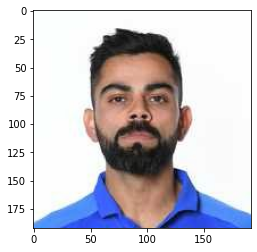

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray.shape

(192, 192)

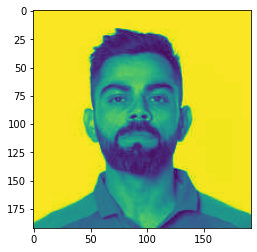

In [5]:
plt.imshow(gray)
plt.show()

In [6]:
face_cascade = cv2.CascadeClassifier(os.path.abspath('../haarcascades/haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.abspath('../haarcascades/haarcascade_eye.xml'))

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[44, 36, 98, 98]], dtype=int32)

In [7]:
(x, y, w, h) = faces[0]
x, y, w, h

(44, 36, 98, 98)

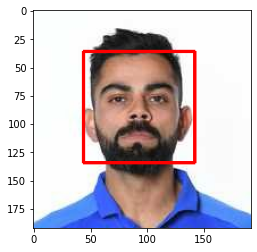

In [8]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)
plt.show()

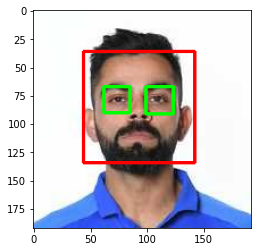

In [9]:
# Now we will draw two eyes
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
plt.figure()
plt.imshow(face_img)
plt.show()

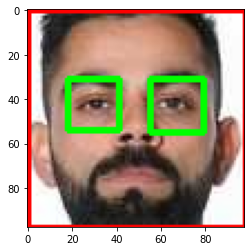

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    roi_image_list = [] 
    for (x, y, w, h) in faces:
        face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            roi_image_list.append(roi_color)
    return roi_image_list

In [12]:
cropped_image = get_cropped_image_if_2_eyes(os.path.abspath('../dataset/trail_data/img_01.jpg'))
# plt.imshow(cropped_image[0])
len(cropped_image)


0

In [13]:
# Create a folder for cropped image, 
# Where we will save the current data
pre_processed_folder = os.path.abspath('../dataset/pre_processed_data/')
raw_data = os.path.abspath('../dataset/raw_data/')

In [14]:
img_directory = []
raw_img_directory = []
processed_img_directory = []

if not os.path.exists(pre_processed_folder):                     # If the pre_processed_data folder does not exists create one
        os.makedirs(pre_processed_folder)
        
for folder in os.scandir(raw_data):
    if folder.is_dir():
        path = os.path.abspath(folder)
        img_directory.append(path)                                # This is useful to check each photo
        path = path.replace("raw_data", "pre_processed_data")     # This path is changes the raw_data folder name to pre_processed_data
        processed_img_directory.append(path)
        if not os.path.exists(path):                              # Thus if the path does not exists
            os.makedirs(path)                                     # Create a new folder

In [15]:
cricketer_file_name_dict = {}

# Lets just iterate through all the images and get the cropped data-set
for i, img_dir in enumerate(img_directory):
    cricketer_name = img_dir.split('\\')[-1]
    current_dir = processed_img_directory[i]
    cricketer_file_name_dict[cricketer_name] = []
    
    count = 0
    for entry in os.scandir(img_dir):
        roi_color_list = get_cropped_image_if_2_eyes(entry.path)
        total_faces = len(roi_color_list)
        if total_faces != 0:
            for face in range(total_faces):
                roi_color = roi_color_list[face]
                path = os.path.join(current_dir, cricketer_name+str(count)+".png")
                cricketer_file_name_dict[cricketer_name].append(path)
                cv2.imwrite(path, roi_color)
                count = count + 1
    print(cricketer_name, "Done!!!")

ms_dhoni Done!!!
ravindra_jadeja Done!!!
rohit_sharma Done!!!
sachin_tendulkar Done!!!
virat_kohli Done!!!
